Gaussian Kernel (3x3):
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


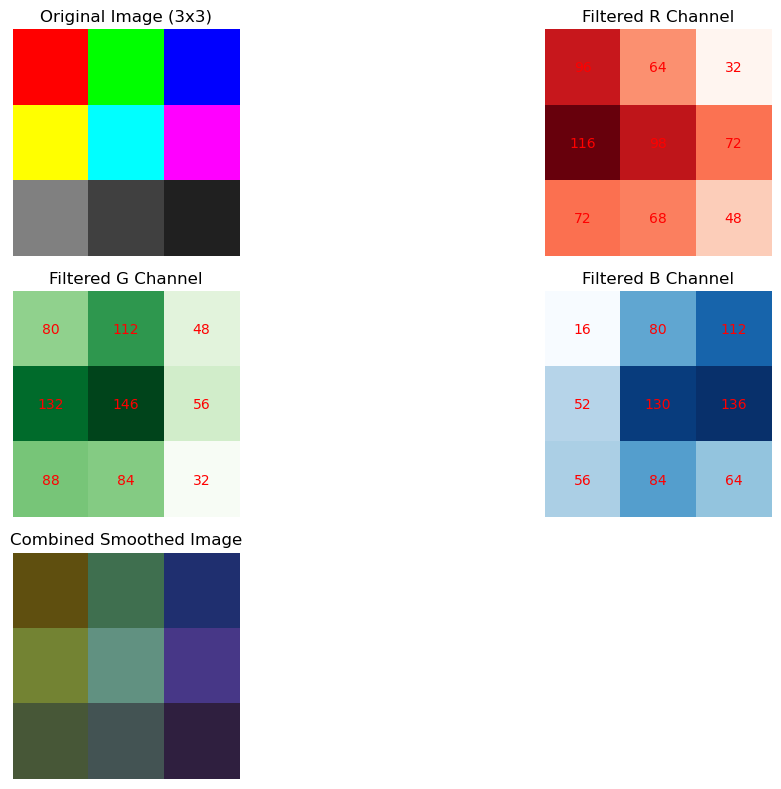

In [12]:
"""
This program demonstrates the process of applying a 3x3 Gaussian filter to an image to smooth out noise while preserving edges.

Steps involved:

1. **Original Image Creation**: 
   A 3x3 image is manually created with three color channels: Red (R), Green (G), and Blue (B). Each pixel in the image is represented by an RGB value, where each channel (R, G, B) contains an integer between 0 and 255 that represents the intensity of that color.
   
   Example of a 3x3 image:
   Image dimensions: (3x3x3), where each pixel is represented by a tuple of three values corresponding to RGB channels.
   Original Image:
   [[255, 0, 0], [0, 255, 0], [0, 0, 255]]
   [[255, 255, 0], [0, 255, 255], [255, 0, 255]]
   [[128, 128, 128], [64, 64, 64], [32, 32, 32]]
   The matrix size is (3x3), and each pixel has its own RGB value.

2. **Zero Padding**:
   To apply a convolution filter (in this case, a Gaussian filter), the image needs to be padded to handle edge cases (i.e., the pixels on the borders of the image). Zero padding is applied to extend the image size by one pixel on each side. This ensures that even edge pixels have enough neighboring pixels for the filtering operation.
   
   Example:
   - Original 3x3 image:
     [[255, 0, 0], [0, 255, 0], [0, 0, 255]]
   - After zero padding, the image becomes 5x5:
     [[0, 0, 0, 0, 0], 
      [0, 255, 0, 0, 0], 
      [0, 255, 255, 0, 0], 
      [0, 128, 64, 32, 0], 
      [0, 0, 0, 0, 0]]
   The size changes from (3x3) to (5x5), allowing the filter to work even on the edges.

3. **Applying the 3x3 Gaussian Filter**:
   A 3x3 Gaussian filter (also called kernel) is used for smoothing the image. The Gaussian filter is based on a Gaussian function, which assigns higher weights to the center pixel and lower weights to the surrounding pixels, thus giving more importance to the center. This helps in better edge preservation during smoothing.

   Example:
   For a pixel at position (i, j) in the image, the 3x3 Gaussian kernel is applied as follows:
   Gaussian Kernel:
   [[1/16, 2/16, 1/16], 
    [2/16, 4/16, 2/16], 
    [1/16, 2/16, 1/16]]
   
   The value of the pixel at position (i, j) in the filtered image is computed by taking the weighted sum of the surrounding 9 pixels (including the center pixel itself), with the kernel weights applied accordingly. This reduces noise while preserving the overall image structure.
   
   Mathematically:
   - Filtered Pixel Value at [i, j] = (sum of weighted 3x3 neighbors using Gaussian kernel)

4. **Filtering Individual Color Channels**:
   Each color channel (Red, Green, Blue) is processed separately. The Gaussian filter is applied to each color channel individually, and the resulting filtered channels are recombined to form the final smoothed image. This preserves the original color composition while reducing noise.

5. **Displaying the Filtered Channels**:
   The Red, Green, and Blue channels of the image are processed individually. The filter is applied to each color channel separately. This way, the resulting filtered image can retain its original color composition while being smoothed. Each filtered channel is then displayed separately with the smoothed values overlaid in red color on the filtered image for easy identification.
   
   In each channel, the smoothed values are computed based on the neighboring pixel values, and the final smoothed value is displayed on the original matrix.

6. **Resulting Output**:
   - **Original Image**: The original 3x3 image with raw RGB values is displayed.
   - **Padded Image**: Shows the image after zero padding has been applied. This image has been extended to 5x5 to enable the convolution operation.
   - **Filtered R, G, B Channels**: Displays each individual channel (Red, Green, and Blue) after filtering with the Gaussian filter. The smoothed values are displayed with red-colored overlay for clarity.
   
7. **Matplotlib Visualization**:
   The `matplotlib` library is used to visualize the images in various stages: the original image, the padded image, and the filtered channels. The red overlay helps highlight the smoothed pixel values on each channel, making it easy to compare the raw and filtered results.
   - The filtered channels are shown using `matplotlib.imshow()`, and the pixel values are displayed overlaid in red.
   - `plt.subplot()` is used to organize the display of the images in a grid layout for easy comparison.

In summary, the program demonstrates the following image processing techniques:
   - **Zero Padding** to handle edges during filtering.
   - **3x3 Gaussian Filtering** to smooth out noise while preserving edges better than an average filter.
   - **Displaying Filtered Channels** for each color channel (R, G, B).
   - **Matplotlib** for visualization of the original, padded, and filtered images.
   
The process results in a smoother image with reduced noise and is particularly useful for image preprocessing in computer vision tasks that require edge preservation.
"""

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a simple 3x3 image (for demonstration)
image = np.array([[[255, 0, 0], [0, 255, 0], [0, 0, 255]],
                  [[255, 255, 0], [0, 255, 255], [255, 0, 255]],
                  [[128, 128, 128], [64, 64, 64], [32, 32, 32]]], dtype=np.uint8)

# Step 2: Apply zero padding (extend by 1 pixel on each side) to make it 5x5
padded_image = np.pad(image, ((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)

# Step 3: Define the 3x3 Gaussian kernel
gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]], dtype=np.float32)
gaussian_kernel /= np.sum(gaussian_kernel)  # Normalize the kernel

print("Gaussian Kernel (3x3):")
print(gaussian_kernel)

# Step 4: Define a function to apply the Gaussian filter manually
def apply_gaussian_filter(channel, kernel):
    # Add zero padding to the channel
    padded = np.pad(channel, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    filtered = np.zeros_like(channel, dtype=np.float32)  # Floating point to retain precision

    for i in range(1, padded.shape[0] - 1):
        for j in range(1, padded.shape[1] - 1):
            # Extract 3x3 region
            region = padded[i-1:i+2, j-1:j+2]
            # Convolve with Gaussian kernel
            filtered[i-1, j-1] = np.sum(region * kernel)
    
    return filtered

# Separate the R, G, B channels from the image
R_channel = image[:, :, 0]
G_channel = image[:, :, 1]
B_channel = image[:, :, 2]

# Step 5: Apply the Gaussian filter to each channel
R_filtered = apply_gaussian_filter(R_channel, gaussian_kernel)
G_filtered = apply_gaussian_filter(G_channel, gaussian_kernel)
B_filtered = apply_gaussian_filter(B_channel, gaussian_kernel)

# Combine the filtered channels back into one image
combined_filtered_image = np.stack((R_filtered, G_filtered, B_filtered), axis=-1).astype(np.uint8)

# Step 6: Define a function to display a channel with overlaid values
def display_channel_with_values(ax, channel, title, cmap):
    ax.imshow(channel, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')

    for i in range(channel.shape[0]):
        for j in range(channel.shape[1]):
            ax.text(j, i, f'{channel[i, j]:.0f}', ha='center', va='center', color='red')

# Step 7: Plot the results
plt.figure(figsize=(12, 8))

# Original Image (3x3)
plt.subplot(3, 2, 1)
plt.imshow(image)
plt.title("Original Image (3x3)")
plt.axis('off')

# Filtered R Channel
ax = plt.subplot(3, 2, 2)
display_channel_with_values(ax, R_filtered, "Filtered R Channel", cmap='Reds')

# Filtered G Channel
ax = plt.subplot(3, 2, 3)
display_channel_with_values(ax, G_filtered, "Filtered G Channel", cmap='Greens')

# Filtered B Channel
ax = plt.subplot(3, 2, 4)
display_channel_with_values(ax, B_filtered, "Filtered B Channel", cmap='Blues')

# Combined Smoothed Image
plt.subplot(3, 2, 5)
plt.imshow(combined_filtered_image)
plt.title("Combined Smoothed Image")
plt.axis('off')

plt.tight_layout()
plt.show()
